In [95]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.multioutput import RegressorChain
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import os

# Get the current working directory
current_dir =os.getcwd()
# Get the current working director
file_path = os.path.join(current_dir, 'data', '2018-0101-2024-05-29_135856_BTCUSDT_15m_klines.csv')
print(file_path)



C:\Users\Desk\Desktop\Github\Graph-Prediction---Research\data\2018-0101-2024-05-29_135856_BTCUSDT_15m_klines.csv


In [96]:
# Load your Bitcoin dataset (assuming it's a CSV file)
# The dataset should have a 'Date' column and a 'Price' column
df = pd.read_csv(file_path,usecols=['Open', 'Close', 'OpenTime'],
    dtype={
        'Open': 'float32',
        'Close': 'float32',
        
    },
    parse_dates=['OpenTime'],
    infer_datetime_format=True,
)
df['Date'] = pd.to_datetime(df['OpenTime'])
df.set_index('Date', inplace=True)

In [140]:

# Create features and target
# Here we'll use previous prices to predict the next price
window_size = 10  # Number of previous steps to use for prediction
h = 5  # Number of steps forward to predict

# Create a function to prepare the dataset
def create_dataset(data, window_size, h):
    X, y = [], []
    for i in range(len(data) - window_size - h + 1):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size:i + window_size + h])
    return np.array(X), np.array(y)

scaler = MinMaxScaler()
df['Close'] = scaler.fit_transform(df[['Close']])

# Prepare the data
X, y = create_dataset(df['Close'].values, window_size, h)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the RegressorChain model
base_estimator = XGBRegressor(n_estimators=200, learning_rate=0.05)
model = RegressorChain(base_estimator=base_estimator)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and test set
y_test = scaler.inverse_transform(y_test)
y_pred = scaler.inverse_transform(y_pred)


In [141]:
import random
def random_color():
    return "#%06x" % random.randint(0, 0xFFFFFF)

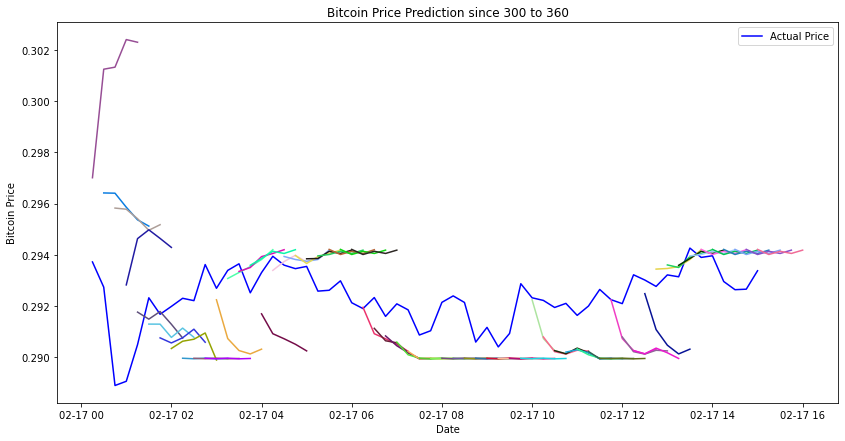

In [142]:
num_points_to_plot = 360
start_points=300 
plt.figure(figsize=(14, 7)) 
plt.plot(df.index[-len(y_test):][start_points:num_points_to_plot], y_test[start_points:num_points_to_plot, 0], label='Actual Price', color='blue') 
for i in range(start_points,num_points_to_plot):
    cur_color=random_color();
    plt.plot(df.index[-len(y_test):][i:i+5], y_pred[i,0:5], color=cur_color) 

plt.xlabel('Date') 
plt.ylabel('Bitcoin Price') 
plt.title(f'Bitcoin Price Prediction since {start_points} to {num_points_to_plot}')
plt.legend() 
plt.show()